# IBM HR Analytics Employee Attrition & Performance

>## Predict attrition of valuable employees

## 목차

##### 1. Data 가져오기


##### 2. EDA (Exploratory Data Analysis)
  + Data 이해
  + 상관분석
  

##### 3. Processing (1차 변수 선택)
  + Columns 삭제
  + 데이터 분류/Encording
  + Dummy Variable
  
 
##### 4. Training & Test sets
  + Scaling the features
  + Hyperparameters 설정
  

##### 5.. Importance Extraction Model
  + Random Forest classifier
    - Accuracy Score
    - F1 Score
    - 주요 Features
    - Vidualising Tree Diagram
    

###### 6. Processing (2차 변수 선택)
  + Random Forest Classifier를 통한 주요 변수 선택 
  

###### 7. Analytical Models
  + SGD (Stochastic Gradient Descent)
    - Accuracy Score
    - F1 Score
  + SVC (Support Vector Machines)
    - Accuracy Score
    - F1 Score
  + ANN (Artificial Neural Network)
    - Accuracy Score
    - F1 Score
    

###### 8.. Conclusion
  + ANN 모델 최종 선택

In [1]:
import numpy as np 
import pandas as pd
from subprocess import check_output

import plotly.offline as py
py.init_notebook_mode(connected=True)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss

## Data 가져오기

In [2]:
attrition = pd.read_csv('/Users/sogoodkim/Documents/Project/패스트캠퍼스/project3_170822/ibm_hr/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print(attrition.shape)
attrition.dtypes

(1470, 35)


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## EDA (Exploratory Data Analysis)

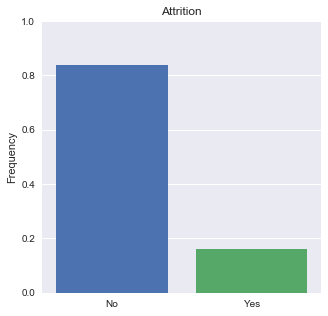

In [4]:
fig = plt.figure(figsize=(5, 5))
y = ["No", "Yes"]
ax = sns.categorical.barplot(y, np.array(attrition.Attrition.value_counts(normalize=True)), saturation=1)
ax.set_xticklabels(y)
ax.set_title("Attrition")
ax.set_xlabel("")
ax.set_ylabel("Frequency")
ax.set_ylim([0,1])
plt.show()

   > Unbalanced Data

#### 평균을 위한 숫자로 변환

In [5]:
attrition.Attrition_numeric = attrition.Attrition
attrition.loc[attrition.Attrition == 'Yes','Attrition_numeric'] = 1
attrition.loc[attrition.Attrition == 'No','Attrition_numeric'] = 0

In [6]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numeric
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


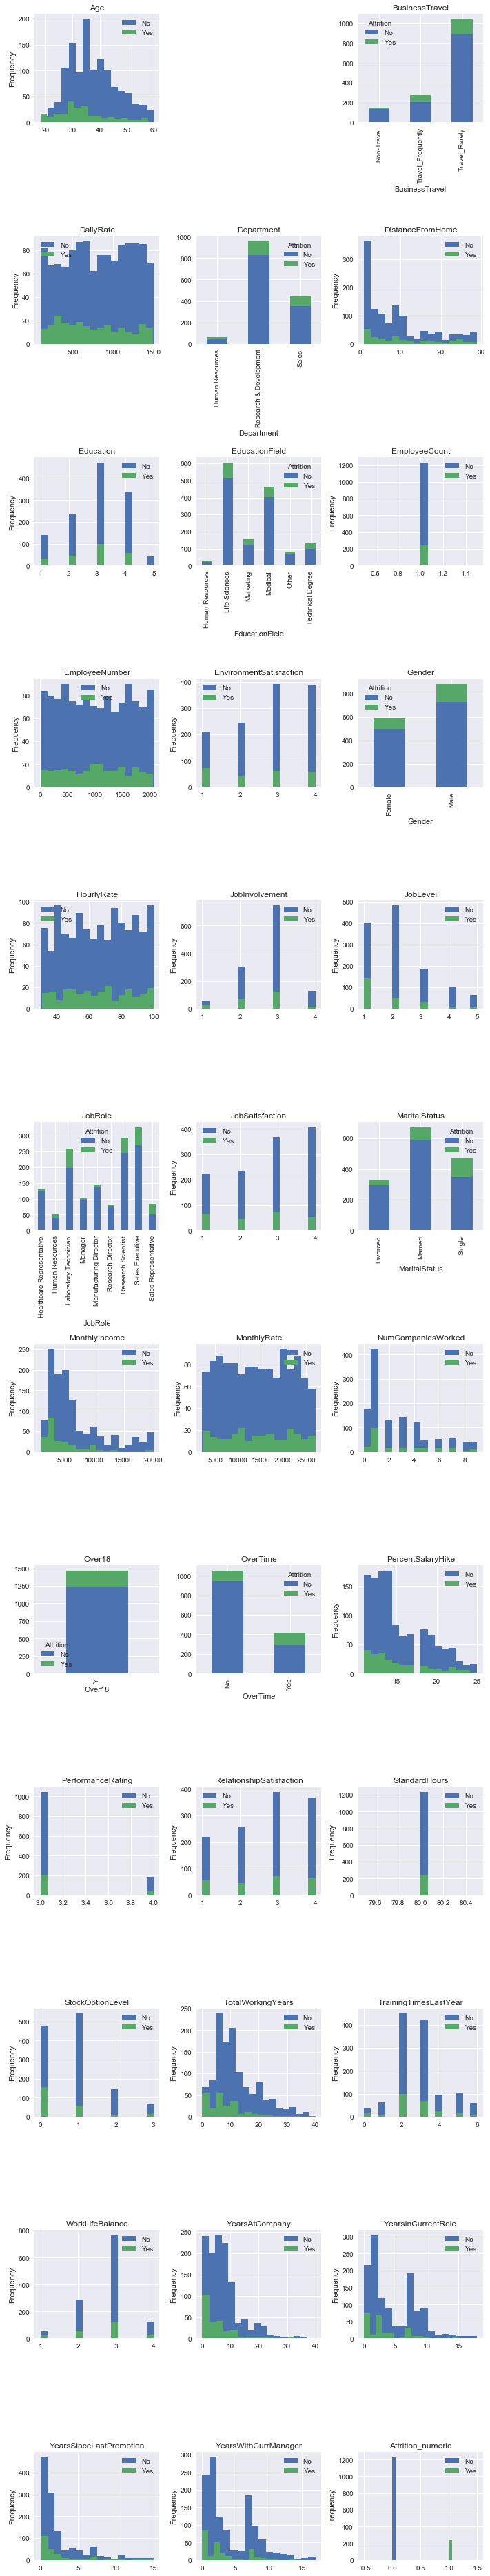

In [7]:
fig = plt.figure(figsize=(10, 52))
cols = 3
target_column = "Attrition"
rows = np.ceil(float(attrition.shape[1] / cols))
for i, column in enumerate(attrition.columns):
    if target_column == column:
        continue
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if attrition.dtypes[column] == np.object:
        cts = attrition[[target_column, column]]
        cts = cts.groupby([target_column, column]).size()
        cts.unstack().T.plot(kind="bar", ax=ax, stacked=True, alpha=1)
    else:
        cts = attrition[[target_column, column]]
        #(xmin, xmax) = (min(cts[column].tolist()), max(cts[column].tolist()))
        cts.groupby(target_column)[column].plot(
            bins=16,
            kind="hist",
            stacked=True,
            alpha=1,
            legend=True,
            ax=ax,
            #range=[xmin, max]
        )
plt.tight_layout()

#### 모든 변수간의 상관관계

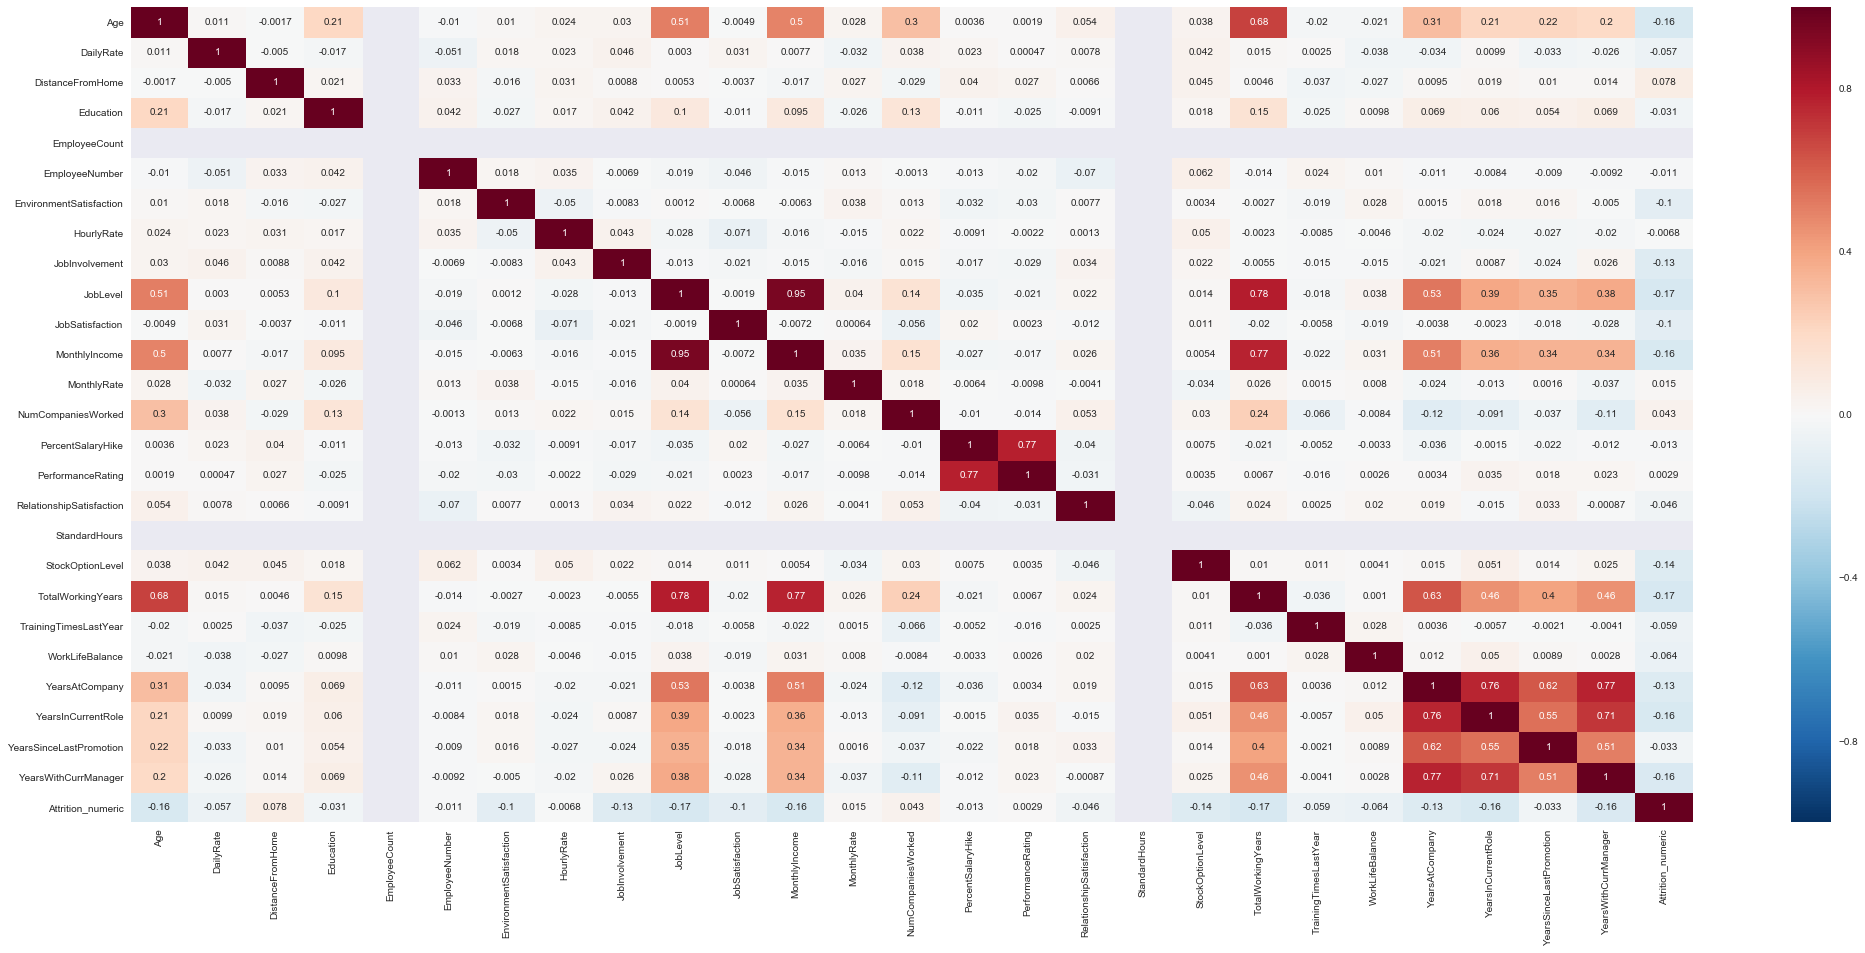

In [8]:
f, ax = plt.subplots(figsize=(35, 15))
sns.heatmap(attrition.corr(), annot=True)

#### Attrition과 변수들간의 상관분석

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



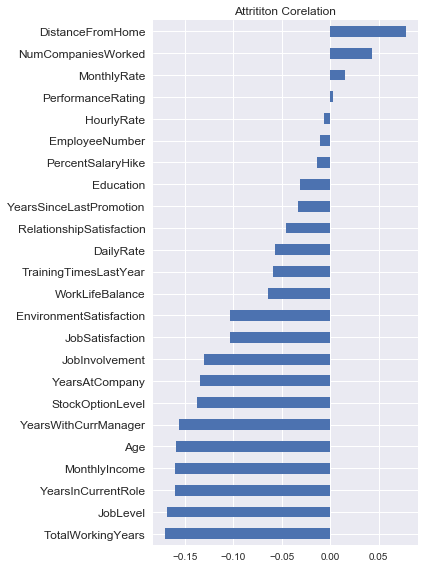

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
ax = attrition.corr().ix["Attrition_numeric"].drop("Attrition_numeric").drop("StandardHours").drop("EmployeeCount").sort_values().plot(kind="barh", figsize=(6, 8), ax=ax)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title("Attrititon Corelation")
plt.tight_layout()
#plt.savefig("AttritionCorelation.png")

## Processing 1 (Cleaning the data)

In [10]:
attrition = attrition[['Attrition',
                   'Age',
                   'BusinessTravel',
                   'DailyRate',
                   'Department',
                   'DistanceFromHome',
                   'Education',
                   'EducationField',
                   'EmployeeCount',
                   'EmployeeNumber',
                   'EnvironmentSatisfaction',
                   'Gender',
                   'HourlyRate',
                   'JobInvolvement',
                   'JobLevel',
                   'JobRole',
                   'JobSatisfaction',
                   'MaritalStatus',
                   'MonthlyIncome',
                   'MonthlyRate',
                   'NumCompaniesWorked',
                   'Over18',
                   'OverTime',
                   'PercentSalaryHike',
                   'PerformanceRating',
                   'RelationshipSatisfaction',
                   'StandardHours',    
                   'StockOptionLevel',
                   'TotalWorkingYears',
                   'TrainingTimesLastYear',
                   'WorkLifeBalance',
                   'YearsAtCompany',
                   'YearsInCurrentRole',
                   'YearsSinceLastPromotion',
                   'YearsWithCurrManager']]

#### Columns 삭제

In [11]:
dataset = attrition.drop(['EmployeeCount'], axis=1) ## 모두 숫자 1 유용하지 않음
dataset = dataset.drop(['StandardHours'], axis=1) ## 모두 숫자 80 유용하지 않음
dataset = dataset.drop(['Over18'], axis=1) ## 전직원이 18세 이상 유용하지 않음
dataset = dataset.drop(['EmployeeNumber'], axis=1) ## 유용하지 않음
dataset = dataset.drop(['PerformanceRating'], axis=1) ## 유용하지 않음

In [12]:
dataset.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,4,1,6,3,3,2,2,2,2


#### Data 분류

In [13]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [14]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,11,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,23,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,15,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,11,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,12,4,1,6,3,3,2,2,2,2


#### Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder 
def lbl_enc(var_x): 
    lbl_enc = LabelEncoder() 
    lbl_enc.fit(y[var_x]) 
    var_x_lbl = var_x 
    y[var_x_lbl] = lbl_enc.transform(y[var_x])

In [16]:
y = pd.DataFrame(y)

In [17]:
lbl_enc('Attrition')
y

,Attrition
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


#### Dummy variable

In [18]:
X = pd.get_dummies(X)
X.shape

(1470, 50)

## Splitting into Training and Testing sets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Scaling the features

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Hyperparameters

In [21]:
dropout = 0.1
epochs = 100
batch_size = 30
optimizer = 'adam'
k = 20

## Importance Extraction Model

### Random Forest Classifier

In [22]:
seed = 0
parameter = {
    'n_jobs': -1,
    'n_estimators': 800,
    'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [23]:
rf = RandomForestClassifier(**parameter)

In [24]:
rf = rf.fit(X_train, y_train)
print("Fitting of Random Forest as finished")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Fitting of Random Forest as finished


In [25]:
rf_predictions = rf.predict(X_test)
print("Predictions finished")

Predictions finished


#### Accuracy Score

In [26]:
accuracy_score(y_test, rf_predictions)

0.86734693877551017

#### F1 Score

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, rf_predictions)

0.26415094339622641

#### Feature importance and Ranking

In [28]:
importances = rf.feature_importances_
importances

array([ 0.05951066,  0.04612696,  0.04226037,  0.01584615,  0.02540481,
        0.04084143,  0.02474586,  0.02679152,  0.02207271,  0.07863287,
        0.04579762,  0.02970007,  0.02933535,  0.02079985,  0.02971579,
        0.05801263,  0.01979246,  0.0175138 ,  0.03393188,  0.02324769,
        0.0242382 ,  0.02918014,  0.00363638,  0.01435388,  0.00636288,
        0.00154696,  0.00867684,  0.00899687,  0.00215231,  0.00648366,
        0.00565729,  0.00667078,  0.00129964,  0.00428947,  0.00656537,
        0.00629423,  0.00148225,  0.00237057,  0.00780733,  0.00098419,
        0.00161692,  0.00051755,  0.00629191,  0.00673873,  0.01180941,
        0.00616007,  0.00788856,  0.019839  ,  0.05117413,  0.04883397])

In [29]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = X.columns.values,
    #x = attrition_final.columns.values,
    
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 6,
        #size= rf.feature_importances_,
        #color = np.random.randn(500),
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

> 5 important features : Monthly Income, Age, Total Working Years, Daily Rate, Distance From Home

#### Visualising Tree Diagram

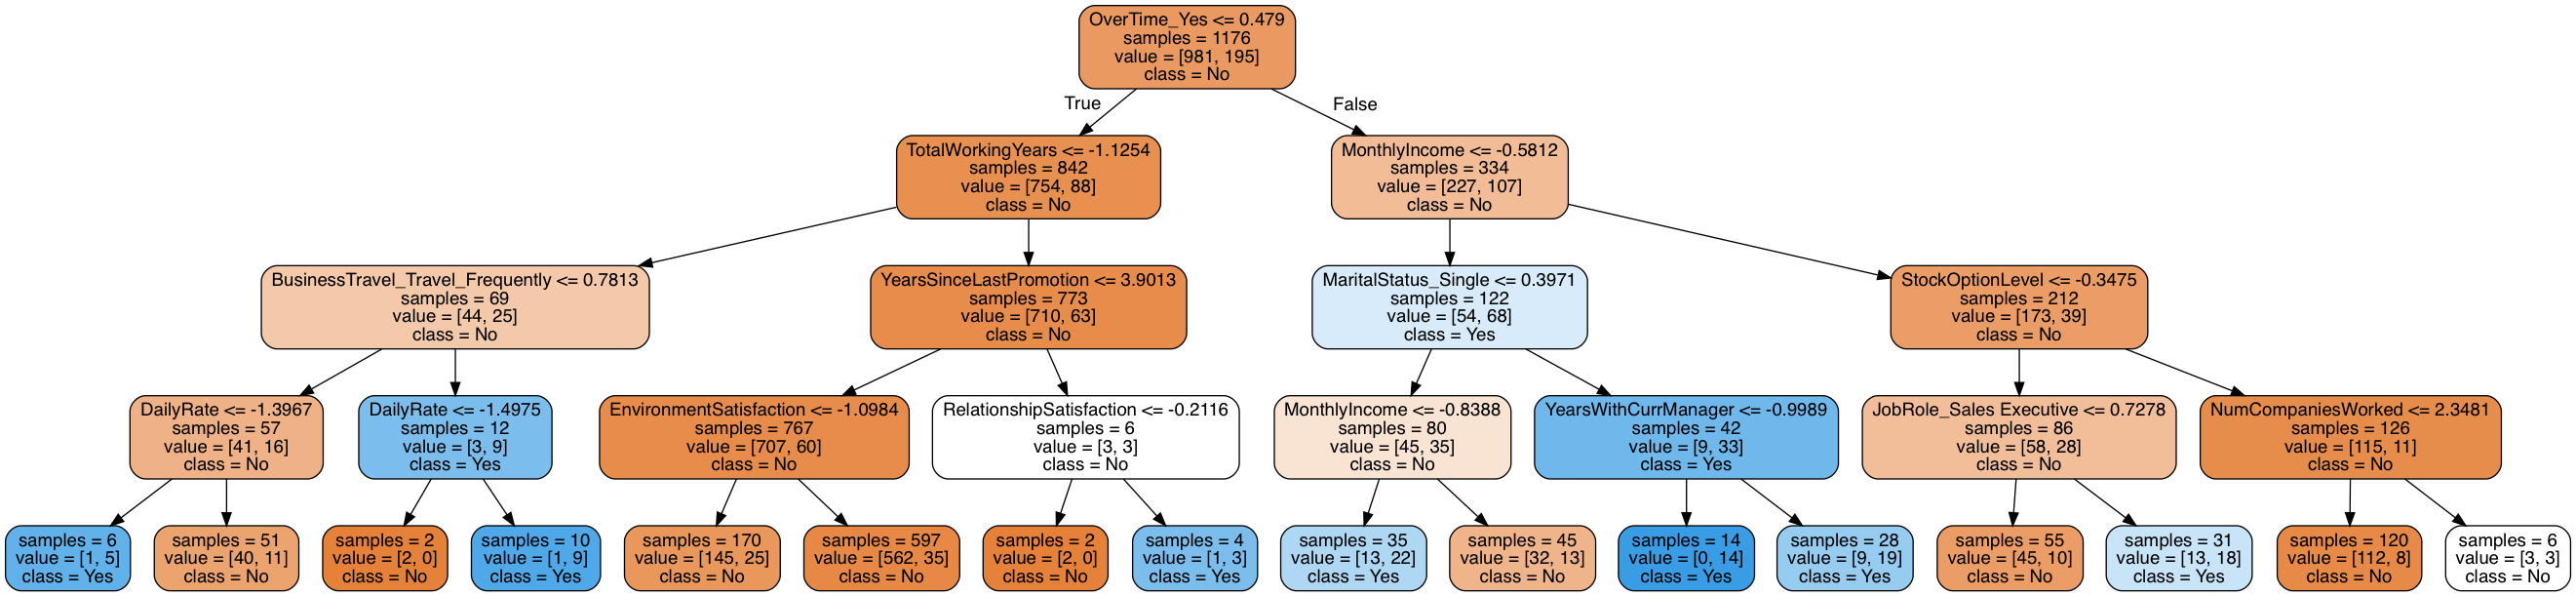

In [30]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = X.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        

check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

## Processing 2

#### Feature Selection 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [32]:
X_list = list(X.columns)

In [33]:
X_train2 = pd.DataFrame(X_train,columns=X_list )
X_test2 = pd.DataFrame(X_test,columns=X_list )

In [34]:
model = SelectFromModel(rf, prefit=True)
feature_idx = model.get_support()
feature_name = X_train2.columns[feature_idx]
train_data = model.transform(X_train2)
test_data = model.transform(X_test2)
train_data_df = pd.DataFrame(train_data, columns=feature_name)
test_data_df = pd.DataFrame(test_data, columns=feature_name)

## Analytical Models

### SGD (Stochastic Gradient Descent)

In [35]:
sgd_params = {'alpha': 0.0001,
              'class_weight': None,
              'l1_ratio': 1,
              'loss': 'log',
              'n_iter': 908,
              'penalty': 'elasticnet',
              'random_state': 1, 
              'shuffle': True}

In [36]:
clf = SGDClassifier(**sgd_params)
clf.fit(train_data_df, y_train)  #rf에서 나온 변수 데이터프레임

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=1, learning_rate='optimal',
       loss='log', n_iter=908, n_jobs=1, penalty='elasticnet', power_t=0.5,
       random_state=1, shuffle=True, verbose=0, warm_start=False)

In [37]:
sgd = clf.fit(train_data_df, y_train)
print("Fitting of SGDClassifier as finished")

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Fitting of SGDClassifier as finished


#### Accuracy Score

In [38]:
print("Accuracy: {}".format(clf.score(test_data_df, y_test)))

Accuracy: 0.8741496598639455


#### F1 Score

In [39]:
sgd_pred = clf.predict(test_data_df)
f1_score(y_test, sgd_pred)

0.41269841269841273

### SVC (Support Vector Machines)

In [40]:
param = {
    "C":1,
    "kernel":"linear",
    "gamma":1,
    "random_state":0,
}

In [41]:
clf = SVC(**param)
clf.fit(train_data_df, y_train) #rf에서 나온 변수 데이터프레임

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
svc = clf.fit(train_data_df, y_train)
print("Fitting of SVC as finished")

Fitting of SVC as finished


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [43]:
svc = SVC(test_data_df)
print("Predictions finished")

Predictions finished


#### Accuracy Score

In [44]:
print("Accuracy: {}".format(clf.score(test_data_df, y_test)))

Accuracy: 0.8809523809523809


#### F1 Score

In [45]:
svc_pred = clf.predict(test_data_df)
f1_score(y_test, svc_pred)

0.42622950819672134

### ANN (Artificial Neural Network)

In [46]:
train_data_df_arr = np.array(train_data_df)

In [47]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (train_data_df.shape[1],)))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', ))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=0)
accuracies = cross_val_score(estimator = classifier, X = train_data_df_arr, y = y_train, cv = 30) #rf에서 나온 변수 데이터프레임
f1_score = cross_val_score(estimator = classifier, X = train_data_df_arr, y = y_train, cv = 30, scoring='f1')
max = accuracies.max()

Using TensorFlow backend.
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



#### Accuracy Score

In [48]:
print("Best accuracy: ",max)

Best accuracy:  0.97499999404


#### F1 score

In [49]:
max = f1_score.max()
print("Best f1: ",max)

Best f1:  0.8


## Conclusion

> EDA를 통해 의미없는 변수들(EmployeeCount,StandardHours, Over18, EmployeeNumber, PerformanceRating)을 1차 제거 후 Random Forest Classifier 모델을 활용하여 중요 변수 선택. 분석 모델 3개 (SGD (Stochastic Gradient Descent), SVC (Support Vector Machines), ANN (Artificial Neural Network)) 중  Accuracy Score와 F1 Score가 가장 높게 나온 ANN 모델을 최종 모델로 선택